**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [3]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [4]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [6]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network-Added two more hidden layer and the activation to tanh & sigmoid

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(356, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


# Compile model

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 9s 157us/step - loss: 0.3184 - acc: 0.9005 - val_loss: 0.1648 - val_acc: 0.9491
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1014 - acc: 0.9688 - val_loss: 0.1139 - val_acc: 0.9641
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0641 - acc: 0.9808 - val_loss: 0.1028 - val_acc: 0.9711
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0479 - acc: 0.9858 - val_loss: 0.0783 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0360 - acc: 0.9890 - val_loss: 0.0734 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0909 - val_acc: 0.9761
Epoch 7/10
60000/60000 [=

Image in the test data at *index*

10000/10000 [==============================] - 0s 36us/step
Evaluation result on Test Data : Loss = 0.10048265264604707, accuracy = 0.979


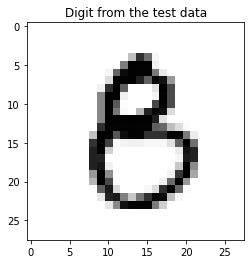

In [13]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 800
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()


In [0]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())
print(history.history.keys())

Predicted digit: 8
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# summarize history for accuracy


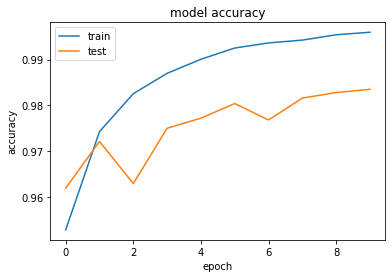

In [0]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss



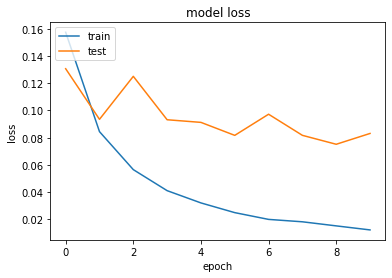

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()